## Importing & Initial EDA

In [1]:
# Importing packages

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats
import statsmodels as sm

# Displaying all columns
pd.set_option("display.max_columns", None)

# Data modelling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,\
classification_report, roc_auc_score, roc_curve, auc, make_scorer

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset into a dataframe
df = pd.read_csv(r"C:\Users\DELL\projects1\waze_dataset.csv")


# Displaying the first few rows of the dataframe
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [3]:
import os
print(os.getcwd())


C:\Users\DELL\projects1


In [4]:
# Gathering basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# Isolating rows with null values
null_df = df[df["label"].isnull()]

# Displaying summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
# Isolating rows without null values
not_null_df = df[~df["label"].isnull()]

# Displaying summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [7]:
# Obtaining count of null values by device
null_df["device"].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

In [8]:
# Calculating % of iPhone nulls and Android nulls
null_df["device"].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [9]:
# Calculating % of iPhone users and Android users in full dataset
df["device"].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

In [10]:
# Calculating counts of churned vs. retained
df["label"].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

In [11]:
# Percentages of churned vs retained users
df["label"].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [12]:
# Calculating median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [13]:
# Adding a column to df called `km_per_drive`
df["km_per_drive"] = df["driven_km_drives"] / df["drives"]

# Grouping by label, calculating the median, and isolating for km per drive
median_km_per_drive_by_label = df.groupby("label")["km_per_drive"].median()

# Printing the median km per drive by label
print(median_km_per_drive_by_label)

label
churned     74.109416
retained    75.014702
Name: km_per_drive, dtype: float64


In [14]:
# Adding a column to df called `km_per_driving_day`
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# Grouping by label, calculating the median, and isolating for km per driving day
median_km_per_driving_day_by_label = df.groupby("label")["km_per_driving_day"].median()

# Printing the median km per driving day by label
print(median_km_per_driving_day_by_label)

label
churned     697.541999
retained    289.549333
Name: km_per_driving_day, dtype: float64


In [15]:
# Adding a column to df called drives_per_driving_day
df["drives_per_driving_day"] = df["drives"] / df["driving_days"]

# Grouping by label, calculating the median, and isolating for drives per driving day
median_drives_per_driving_day_by_label = df.groupby("label")["drives_per_driving_day"].median()

# Printing the median drives per driving day by label
print(median_drives_per_driving_day_by_label)

label
churned     10.0000
retained     4.0625
Name: drives_per_driving_day, dtype: float64


In [16]:
# Calculating the number of Android users and iPhone users for each label
number_of_users_per_label_by_device = df.groupby("label")["device"].value_counts()

# Printing the number of users per label and by device
print(number_of_users_per_label_by_device)

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64


In [17]:
# Calculating the percentage of Android users and iPhone users for each label
percentage_of_users_per_label_by_device = df.groupby("label")["device"].value_counts(normalize=True)

# Printing the percentage of users per label and by device
print(percentage_of_users_per_label_by_device)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64


## EDA Insights

An analysis of Waze user data identified a significant number (700) of missing values in the "label" column, which categorizes users as "retained" or "churned." The median value was chosen to mitigate the impact of outliers on the results.

However, the dataset's suitability for the business problem was questioned due to its focus on frequent, possibly professional drivers. The data may not accurately represent the typical Waze user. Additionally, churned users were found to be more active than retained users, suggesting that the data may not be fully representative of Waze's target audience.

The analysis revealed that churned users generally had higher drive volumes, driving more frequently and covering longer distances than retained users. No significant differences were observed between Android and iPhone users in terms of churn rates.

# Second Stage: Analyse

## Univariate Analysis

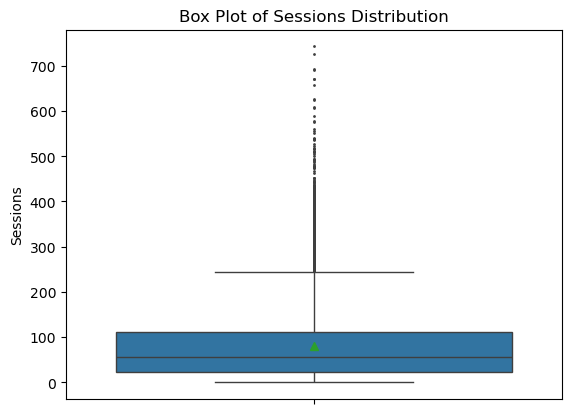

In [18]:
# Univariate Analysis

# Creating a box plot of the "sessions" variable.
sns.boxplot(
    y = "sessions",
    showmeans = True,
    fliersize = 1,
    data = df
)

# Customising the plot with a title and a label.
plt.title("Box Plot of Sessions Distribution")
plt.ylabel("Sessions")
plt.show()

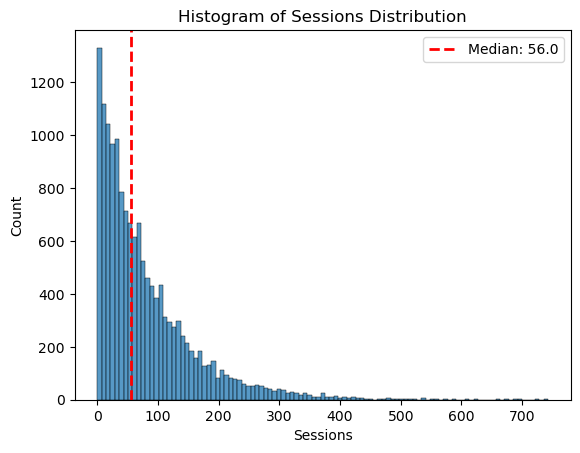

In [19]:
# Histogram of the "sessions" variable.
sns.histplot(
    x = "sessions",
    data = df
)

# Creating a quick median calculation.
median_sessions = df["sessions"].median()

# Rounding the median value to two decimal places.
median_sessions_rounded = round(median_sessions, 2)

# Adding a line for the median.
plt.axvline(x = median_sessions, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_sessions_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Sessions Distribution")
plt.xlabel("Sessions")
plt.ylabel("Count")
plt.legend()
plt.show()

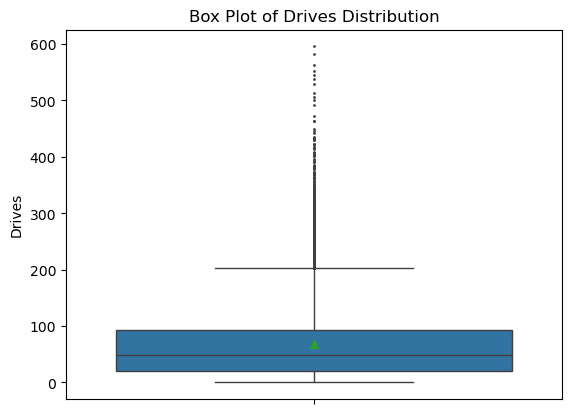

In [20]:
# Creating a box plot of the "drives" variable.
sns.boxplot(
    y = "drives",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of Drives Distribution")
plt.ylabel("Drives")
plt.show()

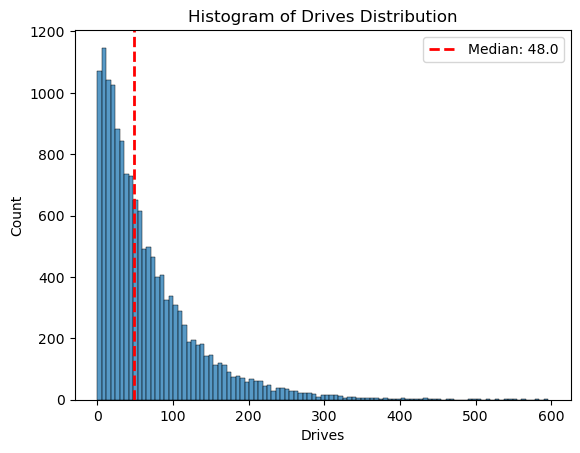

In [21]:
# Histogram of the "drives" variable.
sns.histplot(
    x = "drives",
    data = df
)

# Creating a quick median calculation.
median_drives = df["drives"].median()

# Rounding the median value to two decimal places.
median_drives_rounded = round(median_drives, 2)

# Adding a line for the median.
plt.axvline(x = median_drives, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_drives_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Drives Distribution")
plt.xlabel("Drives")
plt.ylabel("Count")
plt.legend()
plt.show()

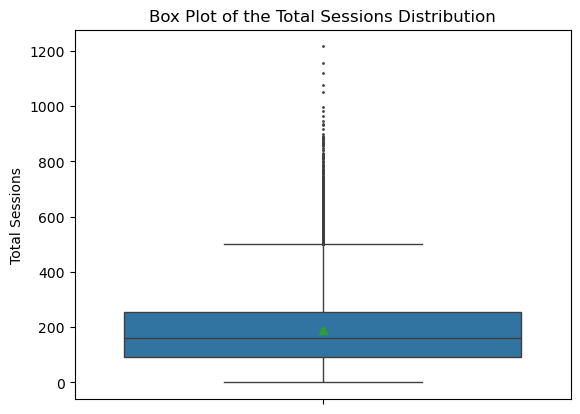

In [22]:
# Creating a box plot of the "total_sessions" variable.
sns.boxplot(
    y = "total_sessions",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of the Total Sessions Distribution")
plt.ylabel("Total Sessions")
plt.show()

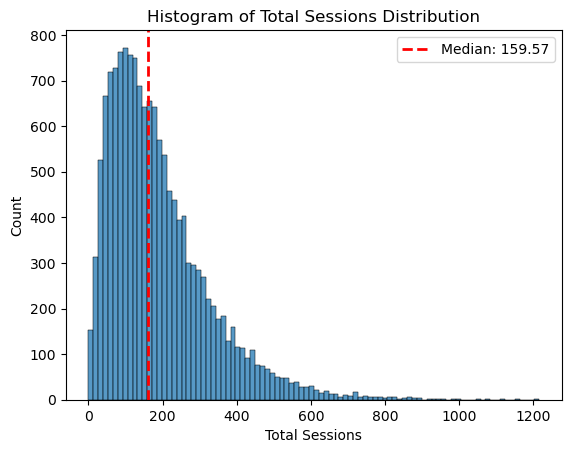

In [23]:
# Histogram of the "total_sessions" variable.
sns.histplot(
    x = "total_sessions",
    data = df
)

# Creating a quick median calculation.
median_total_sessions = df["total_sessions"].median()

# Rounding the median value to two decimal places.
median_total_sessions_rounded = round(median_total_sessions, 2)

# Adding a line for the median.
plt.axvline(x = median_total_sessions, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_total_sessions_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Total Sessions Distribution")
plt.xlabel("Total Sessions")
plt.ylabel("Count")
plt.legend()
plt.show()

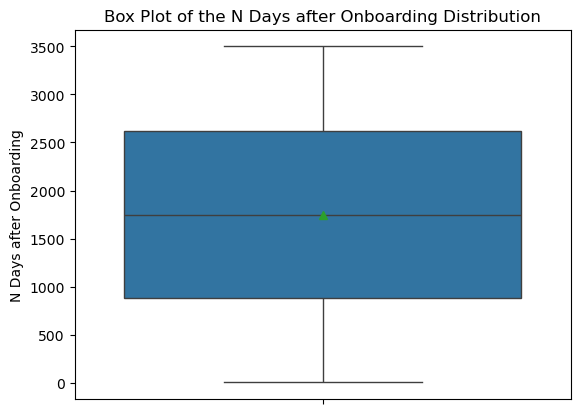

In [24]:
# Box plot of the "n_days_after_onboarding" variable.
sns.boxplot(
    y = "n_days_after_onboarding",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of the N Days after Onboarding Distribution")
plt.ylabel("N Days after Onboarding")
plt.show()

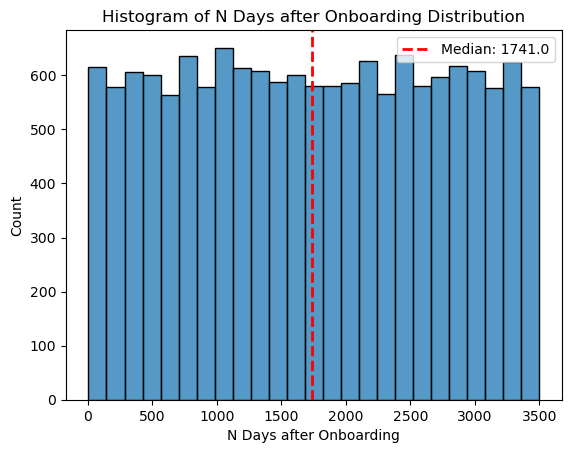

In [25]:
# Histogram of the "n_days_after_onboarding" variable.
sns.histplot(
    x = "n_days_after_onboarding",
    data = df
)

# Creating a quick median calculation.
median_n_days_after_onboarding = df["n_days_after_onboarding"].median()

# Rounding the median value to two decimal places.
median_n_days_after_onboarding_rounded = round(median_n_days_after_onboarding, 2)

# Adding a line for the median.
plt.axvline(x = median_n_days_after_onboarding, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_n_days_after_onboarding_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of N Days after Onboarding Distribution")
plt.xlabel("N Days after Onboarding")
plt.ylabel("Count")
plt.legend()
plt.show()

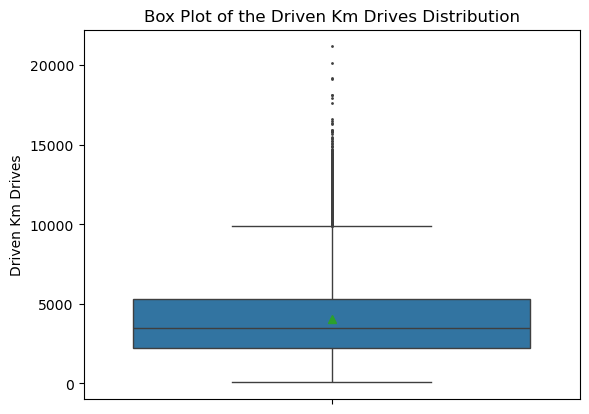

In [26]:
# Box plot of the "driven_km_drives" variable.
sns.boxplot(
    y = "driven_km_drives",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of the Driven Km Drives Distribution")
plt.ylabel("Driven Km Drives")
plt.show()

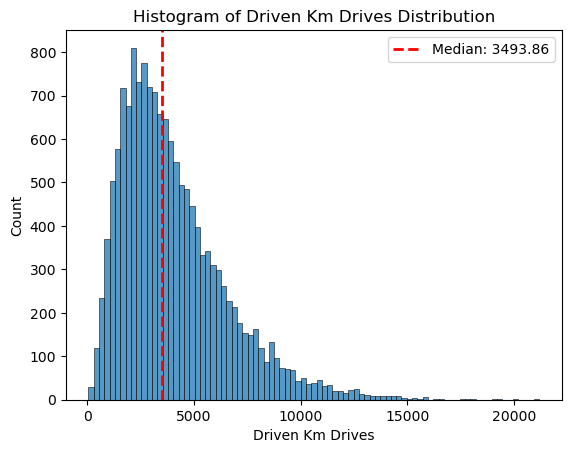

In [27]:
# Histogram of the "driven_km_drives" variable.
sns.histplot(
    x = "driven_km_drives",
    data = df
)

# Creating a quick median calculation.
median_driven_km_drives = df["driven_km_drives"].median()

# Rounding the median value to two decimal places.
median_driven_km_drives_rounded = round(median_driven_km_drives, 2)

# Adding a line for the median.
plt.axvline(x = median_driven_km_drives, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_driven_km_drives_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Driven Km Drives Distribution")
plt.xlabel("Driven Km Drives")
plt.ylabel("Count")
plt.legend()
plt.show()

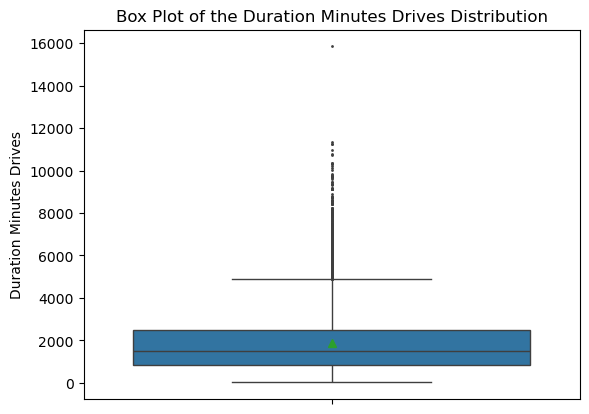

In [28]:
# Box plot of the "duration_minutes_drives" variable.
sns.boxplot(
    y = "duration_minutes_drives",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of the Duration Minutes Drives Distribution")
plt.ylabel("Duration Minutes Drives")
plt.show()

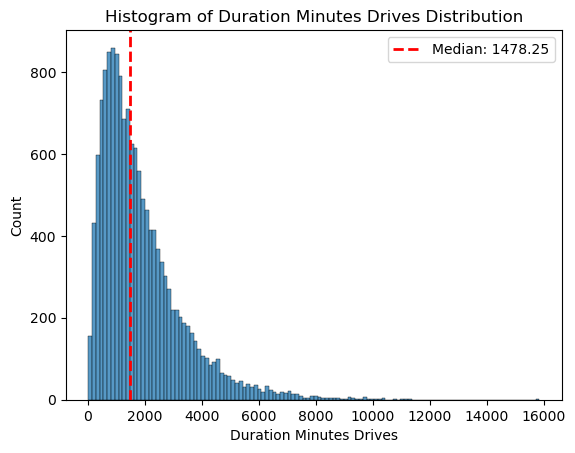

In [29]:
# Histogram of the "driven_km_drives" variable.
sns.histplot(
    x = "duration_minutes_drives",
    data = df
)

# Creating a quick median calculation.
median_duration_minutes_drives = df["duration_minutes_drives"].median()

# Rounding the median value to two decimal places.
median_duration_minutes_drives_rounded = round(median_duration_minutes_drives, 2)

# Adding a line for the median.
plt.axvline(x = median_duration_minutes_drives, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_duration_minutes_drives_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Duration Minutes Drives Distribution")
plt.xlabel("Duration Minutes Drives")
plt.ylabel("Count")
plt.legend()
plt.show()

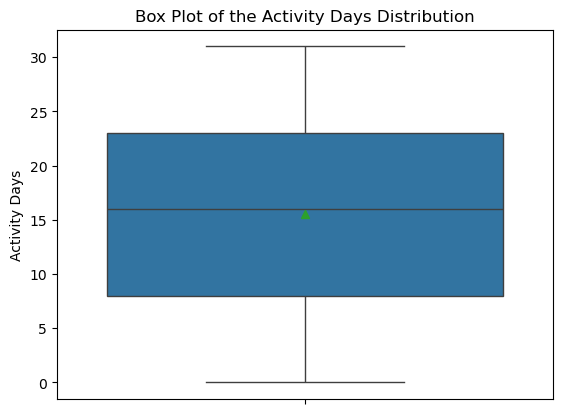

In [30]:
# Box plot of the "activity_days" variable.
sns.boxplot(
    y = "activity_days",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of the Activity Days Distribution")
plt.ylabel("Activity Days")
plt.show()

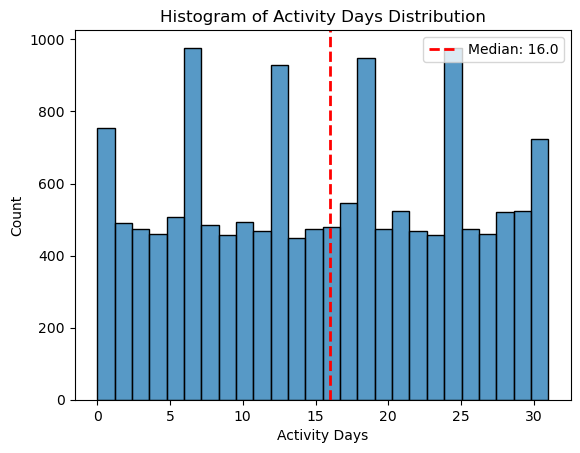

In [31]:
# Histogram of the "activity_days" variable.
sns.histplot(
    x = "activity_days",
    data = df
)

# Creating a quick median calculation.
median_activity_days = df["activity_days"].median()

# Rounding the median value to two decimal places.
median_activity_days_rounded = round(median_activity_days, 2)

# Adding a line for the median.
plt.axvline(x = median_activity_days, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_activity_days_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Activity Days Distribution")
plt.xlabel("Activity Days")
plt.ylabel("Count")
plt.legend()
plt.show()

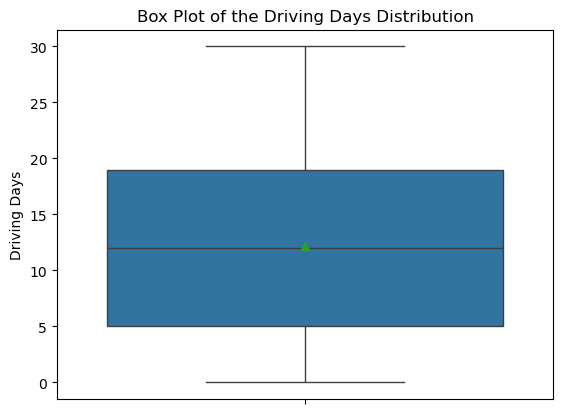

In [32]:
# Box plot of the "driving_days" variable.
sns.boxplot(
    y = "driving_days",
    showmeans = True,
    fliersize = 1,
    data = df 
)

# Customising the plot with a title and a label.
plt.title("Box Plot of the Driving Days Distribution")
plt.ylabel("Driving Days")
plt.show()

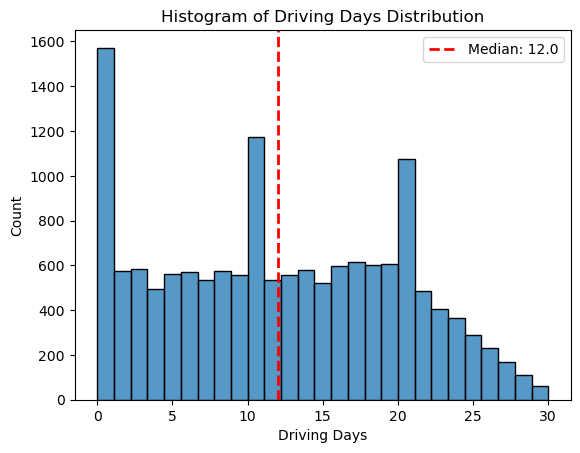

In [33]:
# Histogram of the "driving_days" variable.
sns.histplot(
    x = "driving_days",
    data = df
)

# Creating a quick median calculation.
median_driving_days = df["driving_days"].median()

# Rounding the median value to two decimal places.
median_driving_days_rounded = round(median_driving_days, 2)

# Adding a line for the median.
plt.axvline(x = median_driving_days, color = "r", linestyle = "dashed", linewidth = 2, label = "Median: {}".format(median_driving_days_rounded))

# Customising the plot with a title and a label.
plt.title("Histogram of Driving Days Distribution")
plt.xlabel("Driving Days")
plt.ylabel("Count")
plt.legend()
plt.show()

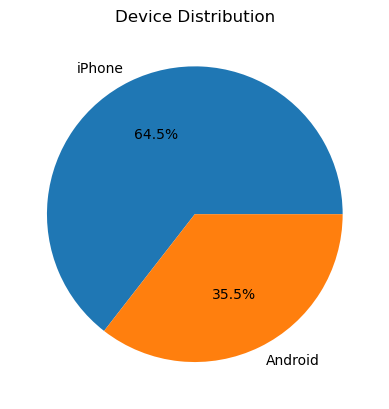

In [34]:
# Obtaining the number of devices
n_device = df["device"].value_counts().sort_values(ascending=False)

# Pie chart of the "device" variable.
plt.pie(n_device, labels = n_device.index, autopct = "%1.1f%%")

# Customising the pie chart with a title.
plt.title("Device Distribution")
plt.show()

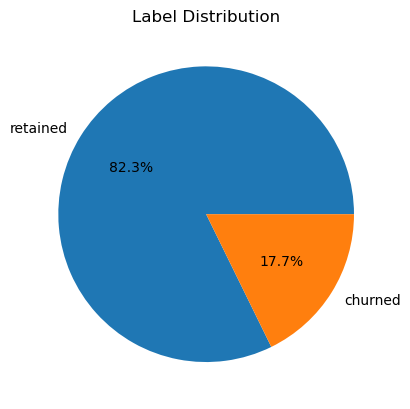

In [35]:
# Obtaining the number of labels.
n_label = df["label"].value_counts().sort_values(ascending=False)

# Pie chart of the "label" variable.
plt.pie(n_label, labels = n_label.index, autopct = "%1.1f%%")

# Customising the pie chart with a title.
plt.title("Label Distribution")
plt.show()

## Bivariate Analysis

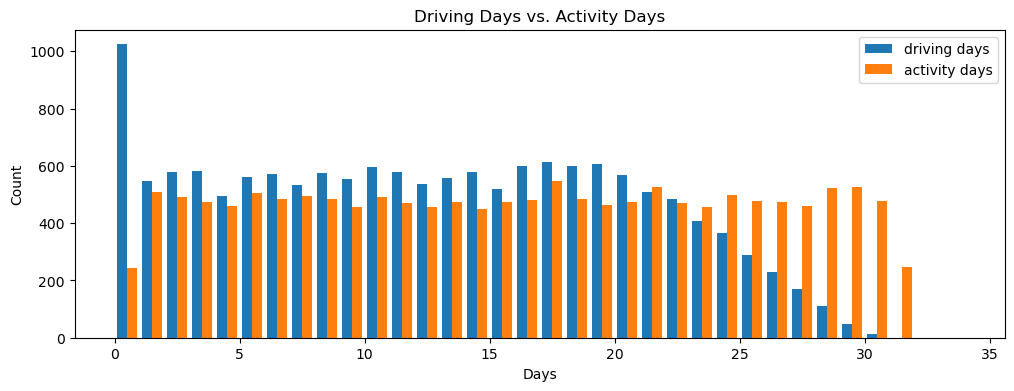

In [36]:
# Bivariate Analysis

# Increasing the plot size
plt.figure(figsize = (12,4))

# Creating a label for both variables.
label = ["driving days", "activity days"]

# Histogram of the "driving days" and "activity_days" variables.
plt.hist([df["driving_days"], df["activity_days"]],
         bins = range(0,35),
         label = label)

# Customising the histogram with a title, labels and a legend.
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.title("Driving Days vs. Activity Days")
plt.show()

In [37]:
# Printing the maximum number of days for the variables "driving_days" and "activity_days".

print("Max Driving Days:", df["driving_days"].max())
print("Max Activity Days:", df["activity_days"].max())

Max Driving Days: 30
Max Activity Days: 31


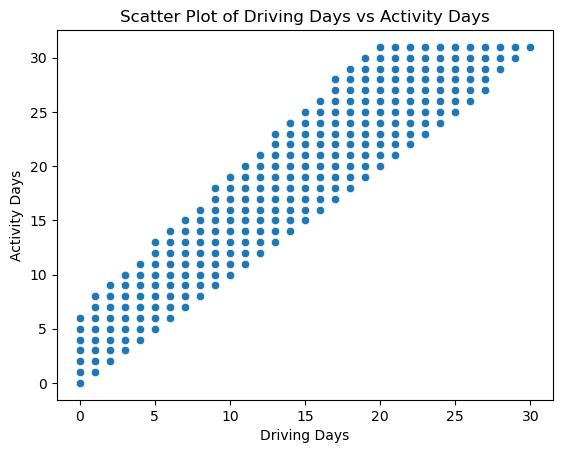

In [38]:
# Scatter plot of the variables "driving_days" and "activity_days".
sns.scatterplot(
    x = "driving_days",
    y = "activity_days",
    data = df
)

# Customising the plot with a title and labels
plt.title("Scatter Plot of Driving Days vs Activity Days")
plt.xlabel("Driving Days")
plt.ylabel("Activity Days")
plt.show()

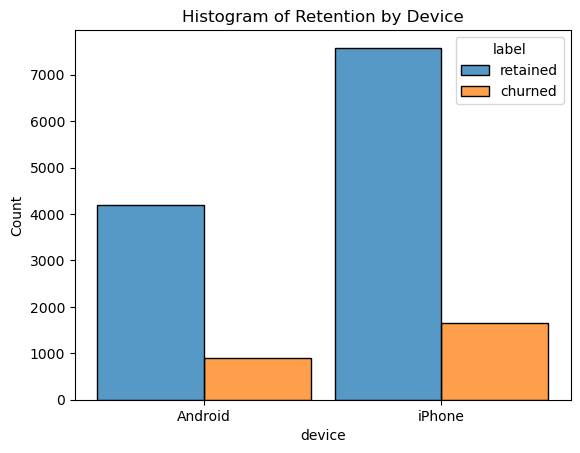

In [39]:
# Histogram of the "device" and "label" combination
sns.histplot(
    data = df,
    x = "device",
    hue = "label",
    multiple = "dodge",
    shrink = 0.9
)

# Customising the plot with a title.
plt.title("Histogram of Retention by Device")
plt.show()

In [40]:
# Calling "describe()" on the "km_per_driving_day" column
df["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [41]:
# Converting infinite values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0

# Confirming that it worked
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

## Multivariate Analysis

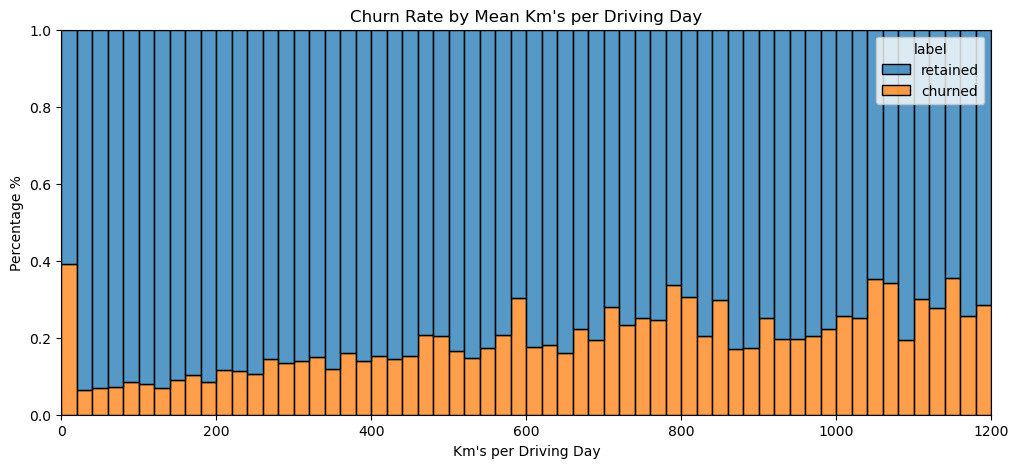

In [42]:
# Multivariate Analysis

# Increasing the plot size
plt.figure(figsize=(12,5))

# Histogram of the new variable "km_per_driving_day" and the "label" variable.
sns.histplot(
    data = df,
    x = "km_per_driving_day",
    bins = range(0,1201,20),
    hue = "label",
    multiple = "fill"
)

# Customising the plot with a title and labels.
plt.xlabel("Km's per Driving Day")
plt.ylabel("Percentage %")
plt.title("Churn Rate by Mean Km's per Driving Day")
plt.show()

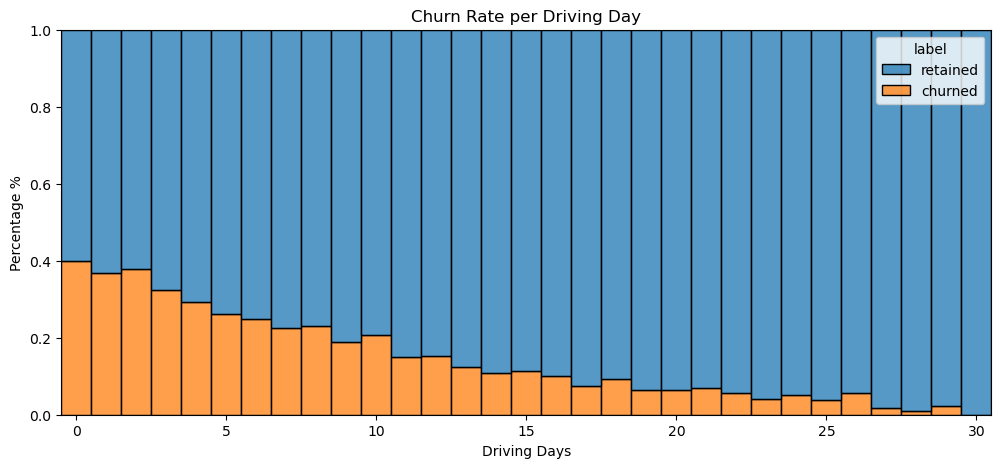

In [43]:
# Increasing the plot size
plt.figure(figsize=(12,5))

# Histogram of the variable "driving_days" and the "label" variable.
sns.histplot(
    data = df,
    x = "driving_days",
    bins = range(1,32),
    hue = "label",
    multiple = "fill",
    discrete = True
)

# Customising the plot with a title and labels.
plt.xlabel("Driving Days")
plt.ylabel("Percentage %")
plt.title("Churn Rate per Driving Day")
plt.show()

In [44]:
# Creating a new column "percent_sessions_in_last_month".
df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]

In [45]:
# Obtaining the median value of the new column "percent_sessions_in_last_month".
df["percent_sessions_in_last_month"].median()

0.42309702992763176

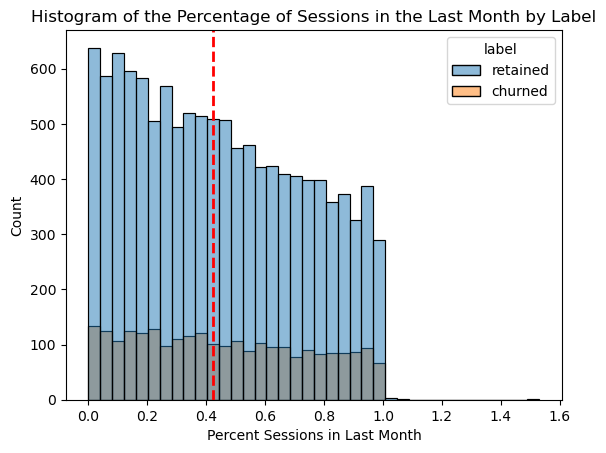

In [46]:
# Histogram of the "percent_sessions_in_last_month" variable.
sns.histplot(
    x = "percent_sessions_in_last_month",
    data = df,
    hue = df["label"],
    multiple = "layer",
)

# Assigning a quick median calculation to use in the plot.
median_percent_sessions_in_last_month = df["percent_sessions_in_last_month"].median()

# Adding a line for the median.
plt.axvline(x = median_percent_sessions_in_last_month, color = "r", linestyle = "dashed", linewidth = 2)

# Customising the plot with a title and a label.
plt.title("Histogram of the Percentage of Sessions in the Last Month by Label")
plt.xlabel("Percent Sessions in Last Month")
plt.ylabel("Count")
plt.show()

In [47]:
# Checking the median of the "n_days_after_onboarding" variable.
df["n_days_after_onboarding"].median()

1741.0

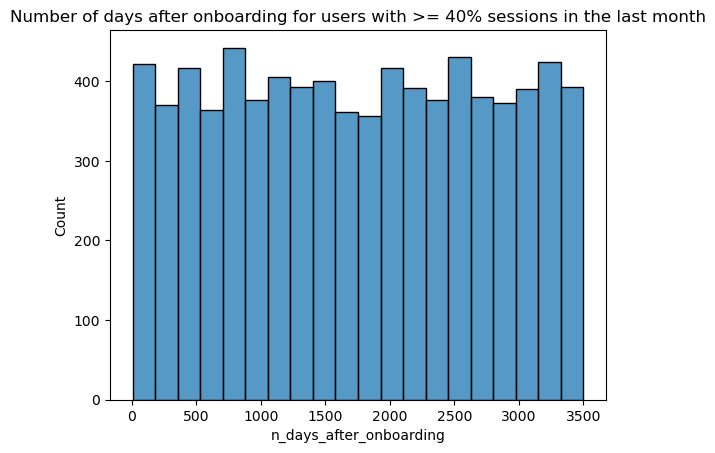

In [48]:
# Determining the percentage of people who had 40% or more of their sessions
# in the last month and assigning them to a new dataframe.
df_forty_percent_sessions_last_month = df.loc[df["percent_sessions_in_last_month"]>=0.4]

# Histogram of the "n_days_after_onboarding" variable just for the people 
# who had 40% or more of their sessions in the last month.
sns.histplot(
    x = df_forty_percent_sessions_last_month["n_days_after_onboarding"]
)

# Customising the plot title.
plt.title("Number of days after onboarding for users with >= 40% sessions in the last month")
plt.show()

In [49]:
# Additional EDA

# Creating a new column for "monthly_drives_per_session_ratio".
df["monthly_drives_per_session_ratio"] = (df["drives"]/df["sessions"])

# Viewing the dataframe's first 10 rows.
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.798587
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,0.343134,0.809524


## Hypothesis Testing

In [50]:
# Creating `map_dictionary`
map_dictionary = {"Android": 2, "iPhone": 1}

# Creating new `device_type` column
df["device_type"] = df["device"]

# Mapping the new column to the dictionary
df["device_type"] = df["device_type"].map(map_dictionary)

# Checking column
df["device_type"].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [51]:
# Grouping average drives by device type
df.groupby("device_type")["drives"].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

### Hypothesis Test Details

**Type of test:** T-test for two independent samples.

**Null Hypothesis (H0):** There is no statistically significant difference between the mean number of drives for each device.

**Alternative Hypothesis (HA):** There is a statistically significant difference between the mean number of drives for each device.

**Significance Level:** 5%

In [52]:
# Isolating the `drives` column for iPhone users.
iPhone = df[df["device_type"] == 1]["drives"]

# Isolating the `drives` column for Android users.
Android = df[df["device_type"] == 2]["drives"]

# Performing the t-test
stats.ttest_ind(a = iPhone, b = Android, equal_var = False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

### Hypothesis Test Result

A P-value of 0.14 was obtained, or 14%, which means the P-value is greater than the significance level of 5%, as such we fail to reject the null hypothesis and conclude that there is indeed no statistically meaningful difference between the average amount of rides per device type.

## Analysis Insights

Histograms revealed that most variables were right-skewed, while some exhibited uniform distribution. While a few outliers were observed, the data generally appeared to be of high quality, with no significant issues affecting variables like driven_km_drives.

An anomaly was noted in the activity_days and driving_days variables, with maximum values of 31 and 30 respectively, suggesting potential data discrepancies related to the months represented. Further investigation is necessary to determine if these variables correspond to different months and to identify any underlying reasons for the unusually high user activity during the final month.

The analysis found a churn rate of 18%, with 82% of users remaining retained. A positive correlation was observed between daily driving distance and churn, indicating that users who drove longer distances on a given day were more likely to churn. Conversely, a negative correlation existed between the number of driving days and churn, suggesting that users who drove more frequently were less likely to churn.

Regarding user tenure, the distribution of days since onboarding was relatively uniform, indicating that user longevity did not significantly impact churn rates. 

Finally, the hypothesis test concludes that there is no statistically significant difference between the average amount of rides per device used by the user.

# Third Stage: Construct

## Dataframe 1 Preparation

In [53]:
df1 = pd.read_csv(r"C:\Users\DELL\projects1\waze_dataset.csv")

In [54]:
# Checking the first few rows of the dataset
df1.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [55]:
# Dropping the ID variable
df1 = df1.drop("ID", axis = 1)

In [56]:
# Checking the class balance of the target variable
df1["label"].value_counts(normalize = True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [57]:
# Calling describe on the new dataset
df1.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### Feature Engineering

In [58]:
# Recreating necessary features

# Creating km_per_driving_day column
df1["km_per_driving_day"] = df1["driven_km_drives"] / df1["driving_days"]

# Calling describe() on the new column
df1["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [59]:
# Converting infinite values to zero
df1.loc[df1["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0

# Confirming that it worked
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [60]:
# Creating a professional_driver column
def is_professional_driver(row):
    drives = row["drives"]
    driving_days = row["driving_days"]
    return (drives >= 60) & (driving_days >= 15)

df1["professional_driver"] = df1.apply(is_professional_driver, axis = 1)

In [61]:
# Checking the count of professionals and non-professionals
n_professional_drivers = df1[df1["professional_driver"] == True].shape[0]
n_non_professional_drivers = df1[df1["professional_driver"] == False].shape[0]

# Calculating the churn rate for professionals
professional_driver_churn_rate = df1[df1["professional_driver"] == True]["label"].value_counts(normalize=True)["churned"]

# Calculating the churn rate for non-professionals
non_professional_driver_churn_rate = df1[df1["professional_driver"] == False]["label"].value_counts(normalize=True)["churned"]

# Printing the results
print("Number of Professional Drivers:", n_professional_drivers)
print("Number of Non-Professional Drivers:", n_non_professional_drivers)
print("Churn Rate (Professional Drivers):", professional_driver_churn_rate)
print("Churn Rate (Non-Professional Drivers):", non_professional_driver_churn_rate)

Number of Professional Drivers: 2594
Number of Non-Professional Drivers: 12405
Churn Rate (Professional Drivers): 0.07556270096463022
Churn Rate (Non-Professional Drivers): 0.19879773092879519


### Handling Outliers

In [62]:
# Calling info on the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  bool   
dtypes: bool(1), float64(4)

In [63]:
# Dropping rows with missing data in label column
df1 = df1.dropna(subset = ["label"])

In [64]:
# Imputing outliers
cols_with_outliers = ["sessions", "drives", "total_sessions", 
                     "total_navigations_fav1", "total_navigations_fav2", 
                     "driven_km_drives", "duration_minutes_drives"]

def cap_outliers(df1, col):
    percentile_value = df1[col].quantile(0.95)
    df1.loc[df1[col] > percentile_value, col] = percentile_value
    return df1

for col in cols_with_outliers:
  df1 = cap_outliers(df1.copy(), col)

print(df1)

          label  sessions  drives  total_sessions  n_days_after_onboarding  \
0      retained       243     200      296.748273                     2276   
1      retained       133     107      326.896596                     1225   
2      retained       114      95      135.522926                     2651   
3      retained        49      40       67.589221                       15   
4      retained        84      68      168.247020                     1562   
...         ...       ...     ...             ...                      ...   
14994  retained        60      55      207.875622                      140   
14995  retained        42      35      187.670313                     2505   
14996  retained       243     200      422.017241                     1873   
14997   churned       149     120      180.524184                     3150   
14998  retained        73      58      353.419797                     3383   

       total_navigations_fav1  total_navigations_fav2  driven_k

In [65]:
# Calling describe() on the dataframe
df1.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110


### Encoding variables

In [66]:
# Creating binary label2 column
label_mapping = {"retained": 0, "churned": 1}

df1["label2"] = df1["label"].replace(label_mapping)

df1.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,True,0
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,1246.901868,False,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,False,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,False,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,True,0
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,False,0
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,False,0
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,False,0
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,False,0
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,False,1


In [67]:
# Creating new device2 variable
device_mapping = {"Android": 0, "iPhone": 1}

df1["device2"] = df1["device"].replace(device_mapping)

df1.head(20)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2,device2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,True,0,0
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,1246.901868,False,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,False,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,False,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,True,0,0
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,False,0,1
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,False,0,1
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,False,0,1
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,False,0,0
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,False,1,1


### Model Assumptions

In [68]:
# Generating a correlation matrix
correlation_matrix = df1.corr(method="pearson", numeric_only=True)

correlation_matrix

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2,device2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911,0.012704
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865,0.011684
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568,0.012138
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263,-0.011299
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322,-0.001316
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032,-0.000275
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767,-0.002091
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407,-0.007709
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851,-0.010221
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259,-0.003859


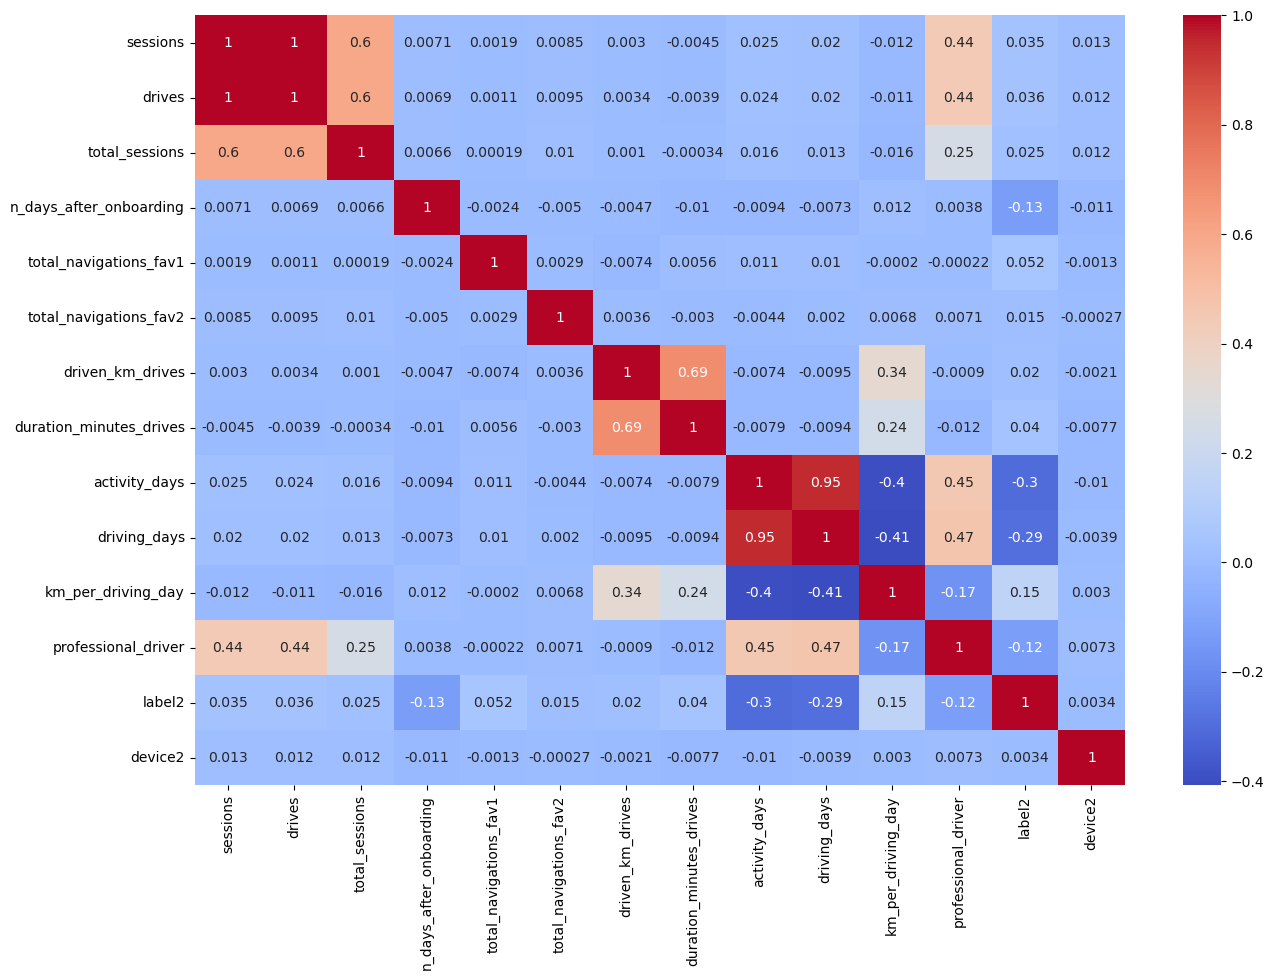

In [69]:
# Plotting a correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.show()

## Logistic Regression

In [70]:
# Isolating predictor variables
cols_to_drop = ["label", "label2", "device", "sessions", "driving_days"]

X = df1.drop(cols_to_drop, axis = 1)

In [71]:
# Isolating target variable
y= df1["label2"]

In [72]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [73]:
# Checking the training data
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,True,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,False,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,False,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,True,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,False,1


In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None, max_iter=400)
model.fit(X_train, y_train)


LogisticRegression(max_iter=400, penalty=None)

In [76]:
# Obtaining the coefficients of each variable
coefficients = model.coef_.squeeze()

feature_names = X_train.columns

coef_series = pd.Series(coefficients, index = feature_names)

print(coef_series)

drives                     0.001938
total_sessions             0.000360
n_days_after_onboarding   -0.000401
total_navigations_fav1     0.001253
total_navigations_fav2     0.000992
driven_km_drives          -0.000013
duration_minutes_drives    0.000110
activity_days             -0.105342
km_per_driving_day         0.000019
professional_driver       -0.007543
device2                    0.023022
dtype: float64


In [77]:
# Obtaining the model's intercept
model.intercept_

array([-0.05805867])

In [78]:
# Getting the predicted probabilities of the training data
y_train_proba = model.predict_proba(X_train)
y_train_proba

array([[0.93742333, 0.06257667],
       [0.62190178, 0.37809822],
       [0.76670756, 0.23329244],
       ...,
       [0.91811964, 0.08188036],
       [0.84885332, 0.15114668],
       [0.93337443, 0.06662557]])

In [79]:
# Copying the X_train dataframe and assigning to logit_data
logit_data = X_train.copy()

# Creating a new logit column in the logit_data df
logit_data["logit"] = [np.log(prob[1] / prob[0]) for prob in y_train_proba]

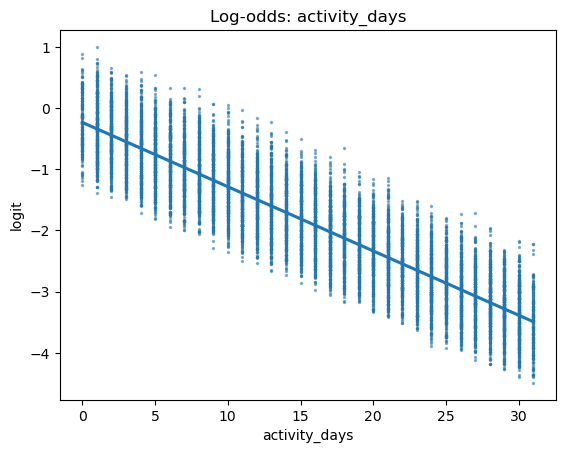

In [80]:
# Plotting regplot of activity_days log-odds
sns.regplot(x = "activity_days", y = "logit", data = logit_data, scatter_kws = {"s": 2, "alpha": 0.5})
plt.title("Log-odds: activity_days");

In [81]:
# Generating predictions on X_test
y_pred = model.predict(X_test)

In [82]:
# Scoring the model (accuracy) on the test data
model.score(X_test, y_test)

0.8243356643356643

In [83]:
# Generating a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2941
           1       0.53      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



In [84]:
# Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

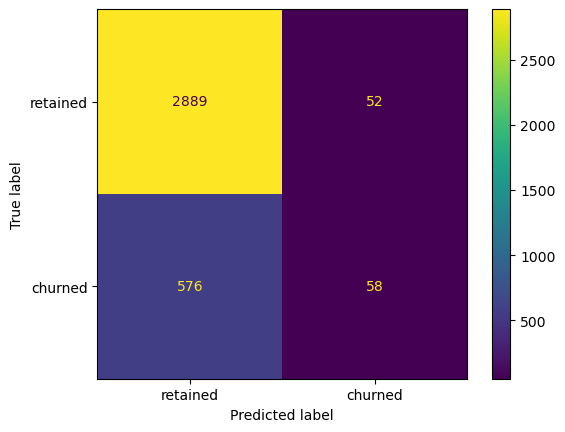

In [85]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                              display_labels = ["retained", "churned"],
                              )
disp.plot(values_format = "");

In [86]:
# Creating a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sorting the list by coefficient value
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
feature_importance

[('device2', 0.02302173491968454),
 ('drives', 0.0019381511660722273),
 ('total_navigations_fav1', 0.001252909076408604),
 ('total_navigations_fav2', 0.0009916877514916191),
 ('total_sessions', 0.0003598034171207901),
 ('duration_minutes_drives', 0.00011002168734227868),
 ('km_per_driving_day', 1.9275862332354223e-05),
 ('driven_km_drives', -1.2892090960511192e-05),
 ('n_days_after_onboarding', -0.0004012762785272784),
 ('professional_driver', -0.007543041675845592),
 ('activity_days', -0.10534189877413497)]

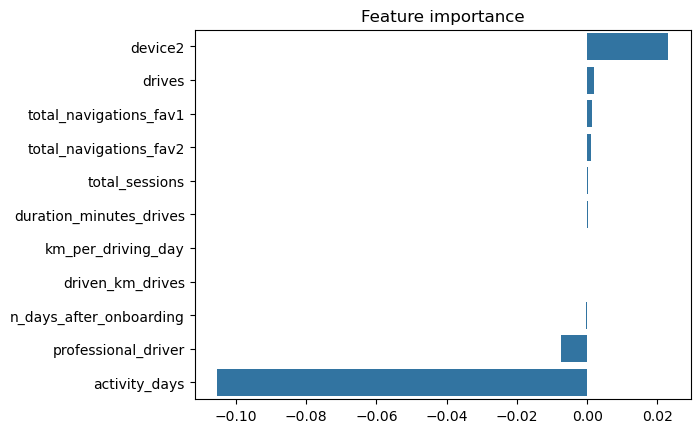

In [87]:
# Plotting the feature importances for Logistic Regression
import seaborn as sns
sns.barplot(x = [x[1] for x in feature_importance],
            y = [x[0] for x in feature_importance],
            orient="h")
plt.title("Feature importance");

## Dataframe 2 Preparation

### Data Preparation

In [88]:
# Loading the dataset into a new dataframe
df2 = pd.read_csv(r"C:\Users\DELL\projects1\waze_dataset.csv")

In [89]:
# Calling info on the new dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### Feature Engineering

In [90]:
# Creating km_per_driving_day feature
df2["km_per_driving_day"] = df2["driven_km_drives"] / df2["driving_days"]

# Obtaining descriptive stats
df2.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


In [91]:
# Converting infinite values to zero
df2["driven_km_drives"] = df2["driven_km_drives"].replace([np.inf, -np.inf], 0)

df2["km_per_driving_day"] = np.where(df2["driving_days"] == 0, 0, df2["driven_km_drives"] / df2["driving_days"])

# Confirming that it worked
df2["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [92]:
# Creating percent_sessions_in_last_month feature
df2["sessions_last_month"] = df2["sessions"].fillna(0)  # Handling potential missing values

df2["percent_sessions_in_last_month"] = df2["sessions_last_month"] / df2["total_sessions"] * 100

# Getting descriptive stats
df2["percent_sessions_in_last_month"].describe()

count    14999.000000
mean        44.925534
std         28.691863
min          0.000000
25%         19.622145
50%         42.309703
75%         68.721626
max        153.063707
Name: percent_sessions_in_last_month, dtype: float64

In [93]:
# Creating professional_driver feature
df2["professional_driver"] = np.where((df2["drives"] >= 60) & (df2["driving_days"] >= 15), 1, 0)

In [94]:
# Creating total_sessions_per_day feature
df2["total_sessions_per_day"] = df2["total_sessions"] / df2["n_days_after_onboarding"]

In [95]:
# Getting descriptive stats
df2["total_sessions_per_day"].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [96]:
# Creating km_per_hour feature
df2["km_per_hour"] = df2["driven_km_drives"] / (df2["duration_minutes_drives"] / 60)
df2["km_per_hour"].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

In [97]:
# Creating km_per_drive feature
df2["km_per_drive"] = df2["driven_km_drives"] / df2["drives"]

# Obtaining descriptive stats
print(df2["km_per_drive"].describe())

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64


In [98]:
# Converting infinite values to zero
df2["driven_km_drives"] = df2["driven_km_drives"].replace([np.inf, -np.inf], 0)

df2["km_per_drive"] = np.where(df2["drives"] == 0, 0, df2["driven_km_drives"] / df2["drives"])

# Confirming that it worked
print(df2["km_per_drive"].describe())

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64


In [99]:
# Creating percent_of_sessions_to_favorite feature
df2["total_navigations_favorite"] = df2["total_navigations_fav1"] + df2["total_navigations_fav2"]

df2["percent_of_sessions_to_favorite"] = (df2["total_navigations_favorite"] / df2["total_sessions"]) * 100

# Obtaining descriptive stats
df2["percent_of_sessions_to_favorite"].describe()

count    14999.000000
mean       166.543919
std        886.566603
min          0.000000
25%         20.347103
50%         64.981807
75%        163.852641
max      77756.362912
Name: percent_of_sessions_to_favorite, dtype: float64

### Handling Outliers

In [100]:
# Dropping rows with missing values
df2 = df2.dropna(subset=["label"])

### Variable Encoding

In [101]:
# Creating new device2 variable
df2["device2"] = np.where(df2["device"]=="Android", 0, 1)
df2[["device", "device2"]].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [102]:
# Creating binary label2 column
df2["label2"] = np.where(df2["label"]=="churned", 1, 0)
df2[["label", "label2"]].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


## Tree-based Models

In [103]:
# Dropping ID column
df2 = df2.drop(["ID"], axis = 1)

In [104]:
# Checking the class balance of label col
class_balance = df2["label"].value_counts(normalize = True)

# Printing the class balance
print(class_balance)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


In [105]:
# Isolating X variables
X = df2.drop(["label", "label2", "device"], axis = 1)

# Isolating y variable
y = df2["label2"]

# Splitting into train and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Splitting into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size = 0.25, random_state = 42, stratify = y_train_temp)

In [106]:
# Verifying the number of samples in the data
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(8579, 20) (2860, 20) (2860, 20)
(8579,) (2860,) (2860,)


### Random Forest

In [107]:
# Instantiating the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Creating a dictionary of hyperparameters to tune
cv_params = {"max_depth": [None],
             "max_features": [1.0],
             "max_samples": [1.0],
             "min_samples_leaf": [2],
             "min_samples_split": [2],
             "n_estimators": [300],
             }

# Defining a dictionary of scoring metrics to capture
scoring = {
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "accuracy": make_scorer(accuracy_score)  

}
# Instantiating the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = "recall")

In [108]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 2min 13s
Wall time: 2min 14s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [109]:
# Examining the best score
print("Best score:", rf_cv.best_score_)

Best score: 0.1274381820693466


In [110]:
# Examining the best hyperparameter combo
print("Best parameters:", rf_cv.best_params_)

Best parameters: {'max_depth': None, 'max_features': 1.0, 'max_samples': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [111]:
def make_results(model_name:str, model_object, metric:str):

    # Creating a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {"precision": "mean_test_precision",
                   "recall": "mean_test_recall",
                   "f1": "mean_test_f1",
                   "accuracy": "mean_test_accuracy",
                   }

    # Getting all the results from the CV and putting them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolating the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extracting accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Creating the table of results
    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision],
                          "recall": [recall],
                          "F1": [f1],
                          "accuracy": [accuracy],
                          },
                         )

    return table

In [112]:
# Checking the results
results = make_results("RF cv", rf_cv, "recall")
results

,model,precision,recall,F1,accuracy
0,RF cv,0.464629,0.127438,0.199741,0.819443


### XGBoost

In [116]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost classifier
xgb = XGBClassifier(objective="binary:logistic", random_state=42)

# Hyperparameters
cv_params = {
    "max_depth": [6, 12],
    "min_child_weight": [3, 5],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [300]
}

# Scoring metrics (as a dictionary)
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

# GridSearchCV
xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=cv_params,
    scoring=scoring,      # use dictionary
    refit="recall",       # metric to optimize for refitting
    cv=4
)

# Fit the model
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [117]:
# Examining the best score
xgb_cv.best_score_

0.18002141179720957

In [118]:
# Examining the best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

In [119]:
# Calling make_results() on the GridSearch object
xgb_cv_results = make_results("XGB cv", xgb_cv, "recall")
results = pd.concat([results, xgb_cv_results], axis = 0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.464629,0.127438,0.199741,0.819443
0,XGB cv,0.436997,0.180021,0.254848,0.813265


## Model Selection

### Random Forest

In [120]:
# Using random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [121]:
def get_test_scores(model_name:str, preds, y_test_data):

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision],
                          "recall": [recall],
                          "F1": [f1],
                          "accuracy": [accuracy]
                          })

    return table

In [122]:
# Obtaining validation scores for RF model
rf_val_scores = get_test_scores("RF val", rf_val_preds, y_val)

# Appending to the results table
results = pd.concat([results, rf_val_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.464629,0.127438,0.199741,0.819443
0,XGB cv,0.436997,0.180021,0.254848,0.813265
0,RF val,0.478261,0.130178,0.204651,0.820629


### XGBoost

In [123]:
# Using XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Getting validation scores for XGBoost model
xgb_val_scores = get_test_scores("XGB val", xgb_val_preds, y_val)

# Appending to the results table
results = pd.concat([results, xgb_val_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.464629,0.127438,0.199741,0.819443
0,XGB cv,0.436997,0.180021,0.254848,0.813265
0,RF val,0.478261,0.130178,0.204651,0.820629
0,XGB val,0.412281,0.185404,0.255782,0.808741


The XGBoost model has been selected due to its higher recall and F1 scores, which are more relevant to the business task of predicting user churn.

### Champion Model

In [124]:
# Using XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Getting test scores for XGBoost model
xgb_test_scores = get_test_scores("XGB test", xgb_test_preds, y_test)

# Appending to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.464629,0.127438,0.199741,0.819443
0,XGB cv,0.436997,0.180021,0.254848,0.813265
0,RF val,0.478261,0.130178,0.204651,0.820629
0,XGB val,0.412281,0.185404,0.255782,0.808741
0,XGB test,0.376744,0.159763,0.224377,0.804196


### Confusion Matrix

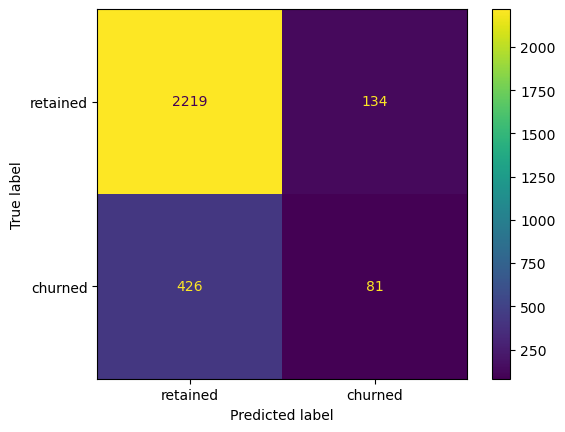

In [125]:
# Generating an array of values for the confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels = xgb_cv.classes_)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = ["retained", "churned"])
disp.plot();

## Feature Importance

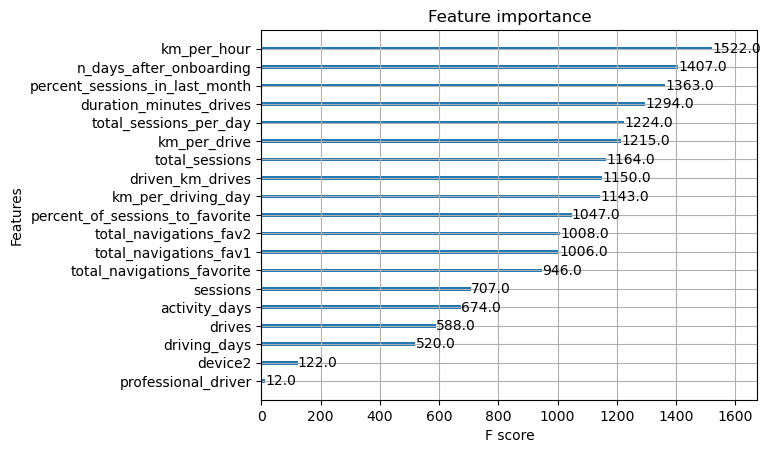

In [126]:
# Plotting the feature importance for the XGBoost model
plot_importance(xgb_cv.best_estimator_);

# Fourth Stage: Execute

## Summary of Model Results

#### Logistic Regression

The logistic regression model exhibited poor performance, achieving an accuracy of 82%. The precision and recall scores of 52%, and 9% respectively indicate that the model does not suit the business adequately. The F1-score of 16% suggests that the model cannot correctly predict both positive and negative cases.

#### Tree-based Models

Both the random forest and the XGBoost models demonstranted improved performance compared to logistic regression. The random forest model achieved a recall of 13% on the validation set, and F1-score of 20%. While the XGBoost model achieved a recall of 16% and an F1-score of 22%, ultimately being selected as the champion model due to the nature of the business task.

#### Logistic Regression

Accuracy: 83% Precision: 52% Recall: 9% F1-score: 16%

#### Random Forest

Accuracy: 82% Precision: 48% Recall: 13% F1-score: 20%

#### XGBoost

Accuracy: 80% Precision: 38% Recall: 16% F1-score: 22%

#### Interpretation:

The XGBoost model outperformed both the Logistic Regression and the Random Forest models in the Recall and F1-score metrics. Which are the metrics most tailored to correctly identifying which users will churn. However, the performance is generally poor, and it is not considered to be a valuable predictive model.

## Conclusion & Recommendations

#### Conclusion

The XGBoost model, despite its overall poor performance, outperformed the Logistic Regression and Random Forest models in terms of recall and F1-score, which are critical metrics for accurately predicting user churn. However, the model's performance is generally insufficient for practical use.

#### Recommendations

Given the limitations of the current models, Waze should consider the following recommendations:

* Data Quality and Quantity: Evaluate the quality and sufficiency of the dataset. Explore the possibility of collecting additional data or refining the existing data to improve model performance.
* Feature Engineering: Continue to experiment with feature engineering techniques to identify new or more informative features that could enhance model accuracy.
* Model Selection and Hyperparameter Tuning: Explore other machine learning algorithms and techniques to potentially improve performance. Conduct thorough hyperparameter tuning for the XGBoost model to optimize its performance.
* Optimal Decision Threshold: Finding an Optimal Decision Threshold may help improve the Recall and F1-score metrics, by sacrificing some of the precision and accuracy of the model.
* External Data Sources: Explore the possibility of incorporating external data sources, such as user demographics or economic indicators, to provide additional insights and potentially improve model performance.